In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
%matplotlib inline
import PIL
import tqdm
import pickle
import numpy as np
import matplotlib.pyplot as plt
from torchvision import datasets
from skimage.filters import gabor
from skimage.feature import local_binary_pattern, greycomatrix, greycoprops
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import os
import shutil

import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression
import random
import pickle
from sklearn import model_selection
from pylab import *
#from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import scipy.fftpack
from skimage import data, io
from scipy.signal import convolve2d as conv2
#import lightgbm as lgb
from sklearn import metrics
from sklearn.model_selection import train_test_split,cross_val_score
from skimage import color, data, restoration
from skimage.feature import greycomatrix,greycoprops

from sklearn.metrics import  accuracy_score, f1_score, precision_score,confusion_matrix, recall_score, roc_auc_score
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.svm import SVC

from sklearn import preprocessing

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

from skimage import data
from skimage.filters import threshold_otsu
from skimage.segmentation import clear_border
from skimage.measure import label, regionprops
from skimage.morphology import closing, square
from skimage.color import label2rgb
import skimage.io as io
import skimage as sk
from skimage import measure
import math
from math import sqrt
from skimage import io, color, img_as_ubyte
from skimage.feature import greycomatrix, greycoprops
from sklearn.metrics.cluster import entropy
from scipy.stats import skew, kurtosis
from numpy import asarray
from PIL import Image
from math import sqrt

import skimage as sk
from skimage import measure

from numpy import asarray
from PIL import Image
import math
from math import sqrt

import skimage as sk
from skimage import measure

from numpy import asarray
from PIL import Image
from skimage import io, color, img_as_ubyte
from skimage.feature import greycomatrix, greycoprops
from sklearn.metrics.cluster import entropy

import scipy
import cv2
from scipy.stats import skew, kurtosis
import skimage
from skimage.filters import threshold_otsu

In [ ]:
import os
import cv2
import numpy as np
import pandas as pd
import glob
from skimage.feature import greycomatrix, greycoprops
from skimage.measure import shannon_entropy

SIZE = 224

train_images = []
train_labels = []

for directory_path in glob.glob("/content/drive/MyDrive/Colab Notebooks/Selected Image/images/Tomato/*"):
    class_label = os.path.basename(directory_path)  # Extract class label from folder name
    print("Processing images in class:", class_label)

    # Process all images in the class directory
    for img_path in glob.glob(os.path.join(directory_path, "*.JPG")):
        print("Processing image:", img_path)
        img = cv2.imread(img_path, 0)  # Read image in grayscale
        img = cv2.resize(img, (SIZE, SIZE))  # Resize image
        train_images.append(img)
        train_labels.append(class_label)  # Append class label

# Convert lists to numpy arrays
train_images = np.array(train_images)
train_labels = np.array(train_labels)

# Feature extraction function with class labels
def feature_extractor(dataset, labels):
    image_dataset = pd.DataFrame()  # Initialize an empty DataFrame outside the loop
    for image, label in zip(dataset, labels):
        df = pd.DataFrame()  # Initialize a new DataFrame for each image
        img = image

        # GLCM features
        GLCM = greycomatrix(img, [1], [0])
        GLCM_Energy = greycoprops(GLCM, 'energy')[0]
        df['Energy'] = GLCM_Energy
        GLCM_corr = greycoprops(GLCM, 'correlation')[0]
        df['Corr'] = GLCM_corr
        GLCM_diss = greycoprops(GLCM, 'dissimilarity')[0]
        df['Diss_sim'] = GLCM_diss
        GLCM_hom = greycoprops(GLCM, 'homogeneity')[0]
        df['Homogen'] = GLCM_hom
        GLCM_contr = greycoprops(GLCM, 'contrast')[0]
        df['Contrast'] = GLCM_contr

        # Shannon entropy
        entropy = shannon_entropy(img)
        df['Entropy'] = entropy

        # Append class label
        df['Class'] = label

        # Append features from current image to the dataset
        try:
            image_dataset = pd.concat([image_dataset, df], ignore_index=True)  # Concatenate the DataFrame for the current image
        except AttributeError as e:
            print("AttributeError:", e)
            print("Type of image_dataset:", type(image_dataset))
            print("Type of df:", type(df))
            print("Shape of df:", df.shape)
            print("Label:", label)

    return image_dataset

# Extract features from training images with class labels
image_features = feature_extractor(train_images, train_labels)


Streaming output truncated to the last 5000 lines.
Processing image: /content/drive/MyDrive/Selected Image/images/Maize/leaf blight/510maize_train_leaf blight.JPG
Processing image: /content/drive/MyDrive/Selected Image/images/Maize/leaf blight/822maize_train_leaf blight.JPG
Processing image: /content/drive/MyDrive/Selected Image/images/Maize/leaf blight/687maize_valid_leaf blight.JPG
Processing image: /content/drive/MyDrive/Selected Image/images/Maize/leaf blight/549maize_train_leaf blight.JPG
Processing image: /content/drive/MyDrive/Selected Image/images/Maize/leaf blight/255maize_valid_leaf blight.JPG
Processing image: /content/drive/MyDrive/Selected Image/images/Maize/leaf blight/2403maize_train_leaf blight.JPG
Processing image: /content/drive/MyDrive/Selected Image/images/Maize/leaf blight/367maize_valid_leaf blight.JPG
Processing image: /content/drive/MyDrive/Selected Image/images/Maize/leaf blight/993maize_train_leaf blight.JPG
Processing image: /content/drive/MyDrive/Selected Im

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0

In [ ]:
# Replace 'healthy' label with 'cashew'
image_features['Class'] = image_features['Class'].replace({'healthy': 'healthy_maize'})
image_features['Class'] = image_features['Class'].replace({'leaf blight': 'maize leaf blight'})

In [ ]:
# Save image_features DataFrame as CSV file
image_features.to_csv("/content/drive/MyDrive/Selected Image/maize_data.csv", index=False)


In [ ]:
image_features

,Energy,Corr,Diss_sim,Homogen,Contrast,Entropy,Class
0,0.033253,0.995714,1.917961,0.492941,18.949071,7.415991,fall armyworm
1,0.047907,0.997526,2.204817,0.524270,17.794503,7.421737,fall armyworm
2,0.033747,0.994876,2.484385,0.394684,14.498959,7.020375,fall armyworm
3,0.033176,0.977364,4.792601,0.322420,75.550368,7.210920,fall armyworm
4,0.020473,0.940090,8.420384,0.152722,164.778247,7.002267,fall armyworm
...,...,...,...,...,...,...,...
21134,0.055311,0.995298,1.576213,0.574176,8.620055,6.631477,leaf beetle
21135,0.121554,0.987877,2.759930,0.492945,96.473455,6.813247,leaf beetle
21136,0.028867,0.974817,4.252542,0.331771,59.652126,6.983855,leaf beetle
21137,0.068640,0.996034,1.119134,0.584126,2.979000,6.136283,leaf beetle


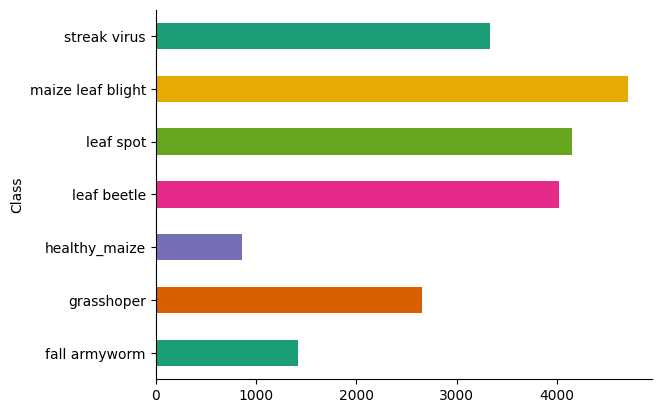

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
image_features.groupby('Class').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

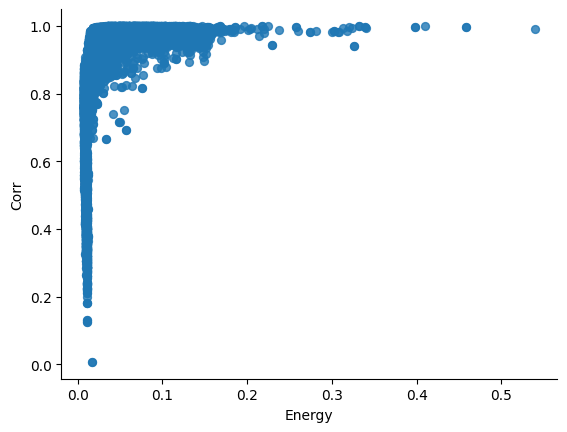

In [ ]:
from matplotlib import pyplot as plt
image_features.plot(kind='scatter', x='Energy', y='Corr', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

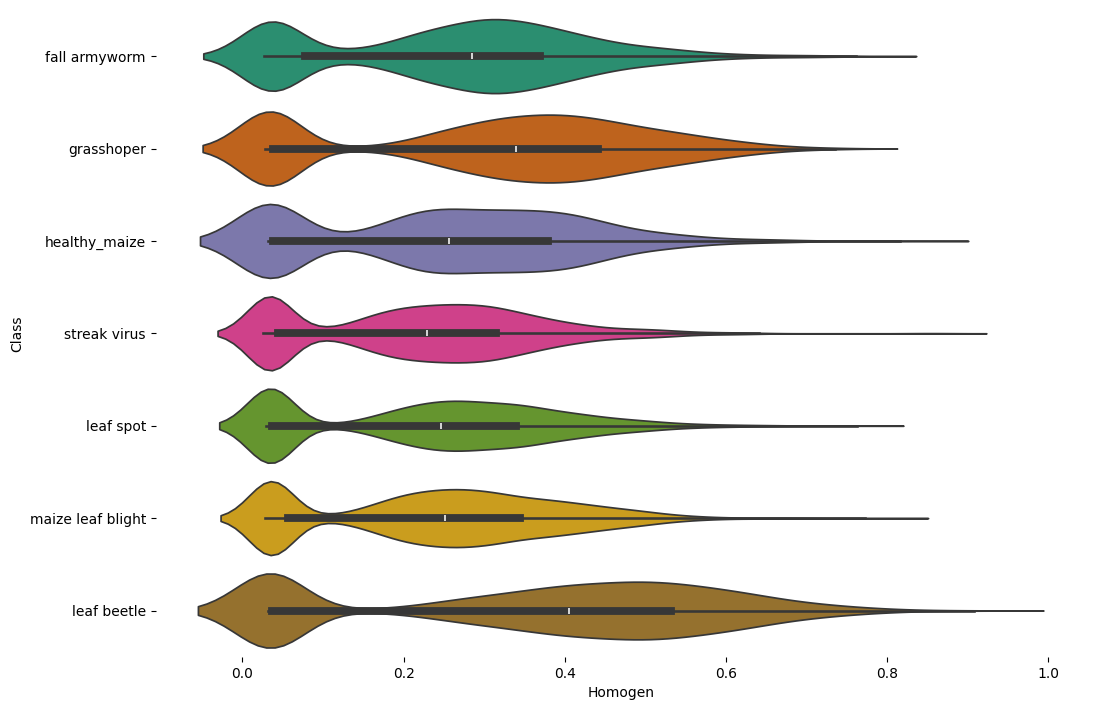

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(image_features['Class'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(image_features, x='Homogen', y='Class', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [ ]:
import os
import cv2
import numpy as np
import pandas as pd
import glob
from skimage.feature import greycomatrix, greycoprops
from skimage.measure import shannon_entropy
from skimage.feature import local_binary_pattern
from scipy.stats import kurtosis, skew
from skimage import io, measure, img_as_ubyte, color
from skimage.filters import threshold_otsu
from math import sqrt
from skimage.filters import gabor
from PIL import Image

SIZE = 224

train_images = []
train_labels = []

for directory_path in glob.glob("/content/drive/MyDrive/Selected Image/images/Maize/*"):
    class_label = os.path.basename(directory_path)  # Extract class label from folder name
    print("Processing images in class:", class_label)

    # Process only the first 10 images in the class directory
    img_counter = 0
    for img_path in glob.glob(os.path.join(directory_path, "*.JPG")):
        if img_counter >= 10:
            break  # Stop processing images after the first 10
        print("Processing image:", img_path)
        img = cv2.imread(img_path, 0)  # Read image in grayscale
        img = cv2.resize(img, (SIZE, SIZE))  # Resize image
        train_images.append(img)
        train_labels.append(class_label)  # Append class label
        img_counter += 1

# Convert lists to numpy arrays
train_images = np.array(train_images)
train_labels = np.array(train_labels)

# Feature extraction function with class labels
def feature_extractor(dataset, labels):
    image_dataset = pd.DataFrame()  # Initialize an empty DataFrame outside the loop
    for image, label in zip(dataset, labels):
        df = pd.DataFrame()  # Initialize a new DataFrame for each image
        img = image

        # GLCM features
        GLCM = greycomatrix(img, [1], [0])
        GLCM_Energy = greycoprops(GLCM, 'energy')[0]
        df['Energy'] = GLCM_Energy
        GLCM_corr = greycoprops(GLCM, 'correlation')[0]
        df['Corr'] = GLCM_corr
        GLCM_diss = greycoprops(GLCM, 'dissimilarity')[0]
        df['Diss_sim'] = GLCM_diss
        GLCM_hom = greycoprops(GLCM, 'homogeneity')[0]
        df['Homogen'] = GLCM_hom
        GLCM_contr = greycoprops(GLCM, 'contrast')[0]
        df['Contrast'] = GLCM_contr

        # Shannon entropy
        entropy = shannon_entropy(img)
        df['Entropy'] = entropy

        # LBP & Gabor
        img_gray = Image.open(img_path).convert('L')
        img_arr = np.array(img_gray)
        feat_lbp = local_binary_pattern(img_arr, 8, 1, 'uniform')  # Radius = 1, No. of neighbors = 8
        feat_lbp = np.uint8((feat_lbp / feat_lbp.max()) * 255)
        lbp_hist, _ = np.histogram(feat_lbp, 8)
        lbp_energy = np.sum((lbp_hist / lbp_hist.sum())**2)
        lbp_entropy = -np.sum((lbp_hist / lbp_hist.sum()) * np.log2(lbp_hist / lbp_hist.sum()))
        df['LBP_Energy'] = lbp_energy
        df['LBP_Entropy'] = lbp_entropy

        gabor_filt_real, gabor_filt_imag = gabor(img_arr, frequency=0.6)
        gabor_filt = (gabor_filt_real**2 + gabor_filt_imag**2) // 2
        gabor_hist, _ = np.histogram(gabor_filt, 8)
        gabor_energy = np.sum((gabor_hist / gabor_hist.sum())**2)
        gabor_entropy = -np.sum((gabor_hist / gabor_hist.sum()) * np.log2(gabor_hist / gabor_hist.sum()))
        df['Gabor_Energy'] = gabor_energy
        df['Gabor_Entropy'] = gabor_entropy

        # Additional features
        try:
            img_gray = img_as_ubyte(color.rgb2gray(io.imread(img_path)))
            distances = [1, 2, 3]
            angles = [0, np.pi / 4, np.pi / 2, 3 * np.pi / 4]
            glcm = greycomatrix(img_gray, distances=distances, angles=angles, symmetric=True, normed=True)
            glcm_entropy = -np.sum(glcm * np.log2(glcm + (glcm == 0)))
            df['GLCM_Entropy'] = glcm_entropy

            props = measure.regionprops(img)
            if len(props) != 0:
                areas = [prop.area for prop in props]
                max_idx = np.argmax(areas)
                prop = props[max_idx]
                perimeter = prop.perimeter
                area = prop.area
                convex_area = prop.convex_area
                solidity = area / convex_area
                eq_diameter = sqrt(4 * area / np.pi)
                circularity = (4 * np.pi * area) / (perimeter ** 2)
                extent = area / (img.shape[0] * img.shape[1])
                filled_area = prop.filled_area
                maj_axis_length = prop.major_axis_length
                min_axis_length = prop.minor_axis_length
                mean_intensity = np.mean(img)
                std_intensity = np.std(img)
                skewness = skew(img.reshape(-1, 1))
                kurt = kurtosis(img.reshape(-1, 1))
                df['Area'] = area
                df['Perimeter'] = perimeter
                df['Solidity'] = solidity
                df['EquivDiameter'] = eq_diameter
                df['Circularity'] = circularity
                df['Extent'] = extent
                df['FilledArea'] = filled_area
                df['MajorAxisLength'] = maj_axis_length
                df['MinorAxisLength'] = min_axis_length
                df['MeanIntensity'] = mean_intensity
                df['StdIntensity'] = std_intensity
                df['Skewness'] = skewness
                df['Kurtosis'] = kurt
        except Exception as e:
            print(f"Error processing additional features for image {img_path}: {e}")

        # Append class label
        df['Class'] = label

        # Append features from current image to the dataset
        try:
            image_dataset = pd.concat([image_dataset, df], ignore_index=True)  # Concatenate the DataFrame for the current image
        except AttributeError as e:
            print("AttributeError:", e)
            print("Type of image_dataset:", type(image_dataset))
            print("Type of df:", type(df))
            print("Shape of df:", df.shape)
            print("Label:", label)

    return image_dataset

# Extract features from training images with class labels
image_features = feature_extractor(train_images, train_labels)


Processing images in class: fall armyworm
Processing image: /content/drive/MyDrive/Selected Image/images/Maize/fall armyworm/529maize_train_farmyw.JPG
Processing image: /content/drive/MyDrive/Selected Image/images/Maize/fall armyworm/1025maize_train_farmyw.JPG
Processing image: /content/drive/MyDrive/Selected Image/images/Maize/fall armyworm/837maize_train_farmyw.JPG
Processing image: /content/drive/MyDrive/Selected Image/images/Maize/fall armyworm/53maize_train_farmyw.JPG
Processing image: /content/drive/MyDrive/Selected Image/images/Maize/fall armyworm/301maize_train_farmyw.JPG
Processing image: /content/drive/MyDrive/Selected Image/images/Maize/fall armyworm/458maize_train_farmyw.JPG
Processing image: /content/drive/MyDrive/Selected Image/images/Maize/fall armyworm/606maize_train_farmyw.JPG
Processing image: /content/drive/MyDrive/Selected Image/images/Maize/fall armyworm/45maize_train_farmyw.JPG
Processing image: /content/drive/MyDrive/Selected Image/images/Maize/fall armyworm/98ma

/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

In [ ]:
image_features

,Energy,Corr,Diss_sim,Homogen,Contrast,Entropy,LBP_Energy,LBP_Entropy,Gabor_Energy,Gabor_Entropy,...,Circularity,Extent,FilledArea,MajorAxisLength,MinorAxisLength,MeanIntensity,StdIntensity,Skewness,Kurtosis,Class
0,0.033253,0.995714,1.917961,0.492941,18.949071,7.415991,0.279421,2.255029,0.161475,2.80949,...,0.062842,0.011240,564,254.777478,215.878966,135.534200,47.021783,-0.016389,-0.950920,fall armyworm
1,0.047907,0.997526,2.204817,0.524270,17.794503,7.421737,0.279421,2.255029,0.161475,2.80949,...,0.019855,0.022700,1141,328.293115,153.244011,80.689473,59.811209,0.869324,-0.392039,fall armyworm
2,0.033747,0.994876,2.484385,0.394684,14.498959,7.020375,0.279421,2.255029,0.161475,2.80949,...,0.038923,0.022421,1126,216.738226,175.591453,98.699737,37.676538,0.785267,1.195332,fall armyworm
3,0.033176,0.977364,4.792601,0.322420,75.550368,7.210920,0.279421,2.255029,0.161475,2.80949,...,0.042595,0.024414,1231,186.753513,118.130829,155.274753,40.938071,-0.606221,-0.019530,fall armyworm
4,0.020473,0.940090,8.420384,0.152722,164.778247,7.002267,0.279421,2.255029,0.161475,2.80949,...,0.411947,0.021664,1087,287.138615,253.801931,126.681222,37.077317,-0.746731,0.733122,fall armyworm
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,0.010426,0.515117,28.593930,0.034048,1291.398863,7.126006,0.279421,2.255029,0.161475,2.80949,...,82.281901,0.014250,715,280.750616,271.772729,173.002691,36.452977,-0.930953,1.224834,leaf beetle
66,0.008917,0.671360,29.207139,0.034471,1361.941604,7.468964,0.279421,2.255029,0.161475,2.80949,...,535.658231,0.011141,559,270.278778,219.634329,124.888194,45.488995,-0.534169,-0.177544,leaf beetle
67,0.009837,0.429644,29.852598,0.033334,1419.747898,7.161962,0.279421,2.255029,0.161475,2.80949,...,93.863286,0.012815,643,260.318510,257.718663,149.107402,35.271958,-0.389402,0.634010,leaf beetle
68,0.008917,0.671360,29.207139,0.034471,1361.941604,7.468964,0.279421,2.255029,0.161475,2.80949,...,535.658231,0.011141,559,270.278778,219.634329,124.888194,45.488995,-0.534169,-0.177544,leaf beetle


In [ ]:
image_features_description = image_features.describe()
print(image_features_description)


          Energy       Corr   Diss_sim    Homogen     Contrast    Entropy  \
count  70.000000  70.000000  70.000000  70.000000    70.000000  70.000000   
mean    0.036778   0.819382  14.719852   0.226953   617.699362   7.040813   
std     0.036708   0.194987  12.391225   0.190069   650.444544   0.454111   
min     0.008075   0.394203   0.701654   0.031517     1.070247   5.224268   
25%     0.008934   0.622899   4.456543   0.034174    68.136201   6.857923   
50%     0.025028   0.953493   6.821669   0.227171   162.890955   7.143984   
75%     0.049706   0.982939  29.458825   0.373835  1386.495971   7.415028   
max     0.155251   0.998551  31.561199   0.684249  1594.295784   7.642181   

       LBP_Energy   LBP_Entropy  Gabor_Energy  Gabor_Entropy  ...  \
count   70.000000  7.000000e+01     70.000000   7.000000e+01  ...   
mean     0.279421  2.255029e+00      0.161475   2.809490e+00  ...   
std      0.000000  1.341887e-15      0.000000   4.472957e-16  ...   
min      0.279421  2.255029e+0

In [ ]:
print(image_features.columns)


Index(['Energy', 'Corr', 'Diss_sim', 'Homogen', 'Contrast', 'Entropy',
       'LBP_Energy', 'LBP_Entropy', 'Gabor_Energy', 'Gabor_Entropy',
       'GLCM_Entropy', 'Area', 'Perimeter', 'Solidity', 'EquivDiameter',
       'Circularity', 'Extent', 'FilledArea', 'MajorAxisLength',
       'MinorAxisLength', 'MeanIntensity', 'StdIntensity', 'Skewness',
       'Kurtosis', 'Class'],
      dtype='object')


In [ ]:
# Get the first row of the DataFrame
first_row = image_features.iloc[0]

# Get duplicated column names and their values
duplicated_columns = first_row[first_row.duplicated()]
duplicated_values = first_row[first_row.duplicated(keep=False)]

# Print duplicated column names
print("Duplicated Column Names:")
print(duplicated_columns.index.tolist())

# Print duplicated values
print("\nDuplicated Values:")
print(duplicated_values)



Duplicated Column Names:
['FilledArea']

Duplicated Values:
Area          564
FilledArea    564
Name: 0, dtype: object


In [ ]:
# Save image_features DataFrame as CSV file
image_features.to_csv("/content/drive/MyDrive/Selected Image/check_data.csv", index=False)

In [ ]:
import os
import cv2
import numpy as np
import pandas as pd
import glob
from skimage.feature import greycomatrix, greycoprops
from skimage.measure import shannon_entropy
from skimage.feature import local_binary_pattern
from scipy.stats import kurtosis, skew
from skimage import io, measure, img_as_ubyte, color
from skimage.filters import threshold_otsu
from math import sqrt
from skimage.filters import gabor
from PIL import Image

SIZE = 224

train_images = []
train_labels = []

for directory_path in glob.glob("/content/drive/MyDrive/Selected Image/images/Tomato/*"):
    class_label = os.path.basename(directory_path)  # Extract class label from folder name
    print("Processing images in class:", class_label)

    for img_path in glob.glob(os.path.join(directory_path, "*.JPG")):
        print("Processing image:", img_path)
        img = cv2.imread(img_path, 0)  # Read image in grayscale
        img = cv2.resize(img, (SIZE, SIZE))  # Resize image
        train_images.append(img)
        train_labels.append(class_label)  # Append class label

# Convert lists to numpy arrays
train_images = np.array(train_images)
train_labels = np.array(train_labels)

# Feature extraction function with class labels
def feature_extractor(dataset, labels):
    image_dataset = pd.DataFrame()  # Initialize an empty DataFrame outside the loop
    for image, label in zip(dataset, labels):
        df = pd.DataFrame()  # Initialize a new DataFrame for each image
        img = image

        # GLCM features
        GLCM = greycomatrix(img, [1], [0])
        GLCM_Energy = greycoprops(GLCM, 'energy')[0]
        df['Energy'] = GLCM_Energy
        GLCM_corr = greycoprops(GLCM, 'correlation')[0]
        df['Corr'] = GLCM_corr
        GLCM_diss = greycoprops(GLCM, 'dissimilarity')[0]
        df['Diss_sim'] = GLCM_diss
        GLCM_hom = greycoprops(GLCM, 'homogeneity')[0]
        df['Homogen'] = GLCM_hom
        GLCM_contr = greycoprops(GLCM, 'contrast')[0]
        df['Contrast'] = GLCM_contr

        # Shannon entropy
        entropy = shannon_entropy(img)
        df['Entropy'] = entropy

        # LBP & Gabor
        img_gray = Image.open(img_path).convert('L')
        img_arr = np.array(img_gray)
        feat_lbp = local_binary_pattern(img_arr, 8, 1, 'uniform')  # Radius = 1, No. of neighbors = 8
        feat_lbp = np.uint8((feat_lbp / feat_lbp.max()) * 255)
        lbp_hist, _ = np.histogram(feat_lbp, 8)
        lbp_energy = np.sum((lbp_hist / lbp_hist.sum())**2)
        lbp_entropy = -np.sum((lbp_hist / lbp_hist.sum()) * np.log2(lbp_hist / lbp_hist.sum()))
        df['LBP_Energy'] = lbp_energy
        df['LBP_Entropy'] = lbp_entropy

        gabor_filt_real, gabor_filt_imag = gabor(img_arr, frequency=0.6)
        gabor_filt = (gabor_filt_real**2 + gabor_filt_imag**2) // 2
        gabor_hist, _ = np.histogram(gabor_filt, 8)
        gabor_energy = np.sum((gabor_hist / gabor_hist.sum())**2)
        gabor_entropy = -np.sum((gabor_hist / gabor_hist.sum()) * np.log2(gabor_hist / gabor_hist.sum()))
        df['Gabor_Energy'] = gabor_energy
        df['Gabor_Entropy'] = gabor_entropy

        # Additional features
        try:
            img_gray = img_as_ubyte(color.rgb2gray(io.imread(img_path)))
            distances = [1, 2, 3]
            angles = [0, np.pi / 4, np.pi / 2, 3 * np.pi / 4]
            glcm = greycomatrix(img_gray, distances=distances, angles=angles, symmetric=True, normed=True)
            glcm_entropy = -np.sum(glcm * np.log2(glcm + (glcm == 0)))
            df['GLCM_Entropy'] = glcm_entropy

            props = measure.regionprops(img)
            if len(props) != 0:
                areas = [prop.area for prop in props]
                max_idx = np.argmax(areas)
                prop = props[max_idx]
                perimeter = prop.perimeter
                area = prop.area
                convex_area = prop.convex_area
                solidity = area / convex_area
                eq_diameter = sqrt(4 * area / np.pi)
                circularity = (4 * np.pi * area) / (perimeter ** 2)
                extent = area / (img.shape[0] * img.shape[1])
                filled_area = prop.filled_area
                maj_axis_length = prop.major_axis_length
                min_axis_length = prop.minor_axis_length
                mean_intensity = np.mean(img)
                std_intensity = np.std(img)
                skewness = skew(img.reshape(-1, 1))
                kurt = kurtosis(img.reshape(-1, 1))
                df['Area'] = area
                df['Perimeter'] = perimeter
                df['Solidity'] = solidity
                df['EquivDiameter'] = eq_diameter
                df['Circularity'] = circularity
                df['Extent'] = extent
                df['FilledArea'] = filled_area
                df['MajorAxisLength'] = maj_axis_length
                df['MinorAxisLength'] = min_axis_length
                df['MeanIntensity'] = mean_intensity
                df['StdIntensity'] = std_intensity
                df['Skewness'] = skewness
                df['Kurtosis'] = kurt
        except Exception as e:
            print(f"Error processing additional features for image {img_path}: {e}")

        # Append class label
        df['Class'] = label

        # Append features from current image to the dataset
        try:
            image_dataset = pd.concat([image_dataset, df], ignore_index=True)  # Concatenate the DataFrame for the current image
        except AttributeError as e:
            print("AttributeError:", e)
            print("Type of image_dataset:", type(image_dataset))
            print("Type of df:", type(df))
            print("Shape of df:", df.shape)
            print("Label:", label)

    return image_dataset

# Extract features from training images with class labels
image_features = feature_extractor(train_images, train_labels)


Streaming output truncated to the last 5000 lines.
Processing image: /content/drive/MyDrive/Selected Image/images/Tomato/leaf blight/1654tomato_train_leaf blight.JPG
Processing image: /content/drive/MyDrive/Selected Image/images/Tomato/leaf blight/2142tomato_train_leaf blight.JPG
Processing image: /content/drive/MyDrive/Selected Image/images/Tomato/leaf blight/4565tomato_train_leaf blight.JPG
Processing image: /content/drive/MyDrive/Selected Image/images/Tomato/leaf blight/245tomato_valid_leaf blight.JPG
Processing image: /content/drive/MyDrive/Selected Image/images/Tomato/leaf blight/4619tomato_train_leaf blight.JPG
Processing image: /content/drive/MyDrive/Selected Image/images/Tomato/leaf blight/954tomato_valid_leaf blight.JPG
Processing image: /content/drive/MyDrive/Selected Image/images/Tomato/leaf blight/1981tomato_train_leaf blight.JPG
Processing image: /content/drive/MyDrive/Selected Image/images/Tomato/leaf blight/1434tomato_train_leaf blight.JPG
Processing image: /content/driv

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version=

In [ ]:
image_features

,Energy,Corr,Diss_sim,Homogen,Contrast,Entropy,LBP_Energy,LBP_Entropy,Gabor_Energy,Gabor_Entropy,...,Circularity,Extent,FilledArea,MajorAxisLength,MinorAxisLength,MeanIntensity,StdIntensity,Skewness,Kurtosis,Class
0,0.046092,0.985547,4.896701,0.284957,93.090727,6.126315,0.155535,2.821448,0.302122,2.08457,...,0.017515,0.038445,1929,332.549779,214.542678,143.268076,56.742917,-0.215109,-1.830805,healthy
1,0.117208,0.982810,5.342189,0.487233,208.731242,6.518884,0.155535,2.821448,0.302122,2.08457,...,0.025497,0.037807,2545,230.313897,113.170028,105.555345,78.002255,0.299634,-1.511051,healthy
2,0.074180,0.988403,3.959241,0.393901,60.622598,6.477554,0.155535,2.821448,0.302122,2.08457,...,0.007902,0.060666,3146,184.147392,118.732776,156.843292,51.104792,-0.313279,-1.560450,healthy
3,0.139914,0.984046,4.169783,0.460571,181.557475,6.004246,0.155535,2.821448,0.302122,2.08457,...,0.010795,0.038604,1946,268.487750,109.007381,109.283761,75.578973,0.173401,-1.422465,healthy
4,0.048490,0.991509,3.394719,0.384626,67.886951,6.576574,0.155535,2.821448,0.302122,2.08457,...,0.013804,0.037588,1891,352.699897,167.621376,133.086037,63.202545,-0.103710,-1.817269,healthy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25998,0.051209,0.993362,3.621016,0.402021,47.468590,7.262628,0.155535,2.821448,0.302122,2.08457,...,0.069656,0.038385,1954,163.169057,117.822856,121.276347,59.833333,0.511269,-1.173513,leaf curl
25999,0.033185,0.992107,3.949271,0.371327,51.205157,7.429625,0.155535,2.821448,0.302122,2.08457,...,0.040471,0.020667,1096,262.299383,129.571169,117.863760,56.932801,0.256871,-1.366963,leaf curl
26000,0.024679,0.983645,5.297265,0.239083,99.386511,7.115911,0.155535,2.821448,0.302122,2.08457,...,0.032245,0.018056,906,216.717412,32.613359,104.404217,55.231236,0.340181,-1.436229,leaf curl
26001,0.036171,0.990996,4.065423,0.333554,45.170564,7.030617,0.155535,2.821448,0.302122,2.08457,...,0.019355,0.021345,1076,349.584634,86.055697,123.682757,50.084699,0.208048,-1.467481,leaf curl


In [ ]:
# Replace 'healthy' label with 'cashew'
image_features['Class'] = image_features['Class'].replace({'healthy': 'healthy_tomato'})
image_features['Class'] = image_features['Class'].replace({'leaf blight': 'leaf blight tomato'})

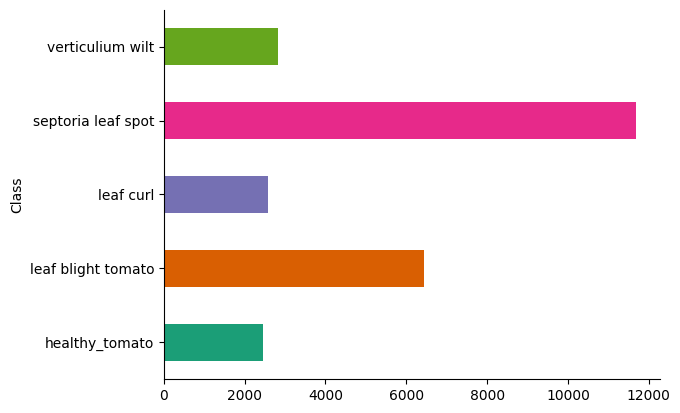

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
image_features.groupby('Class').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
# Save image_features DataFrame as CSV file
image_features.to_csv("/content/drive/MyDrive/Selected Image/tomato_24.csv", index=False)

In [ ]:
import pandas as pd

# Read the first CSV file
df1 = pd.read_csv('/content/drive/MyDrive/Selected Image/cashew_24.csv')

# Read the second CSV file
df2 = pd.read_csv('/content/drive/MyDrive/Selected Image/cassava_24.csv')

# Read the third CSV file
df3 = pd.read_csv('/content/drive/MyDrive/Selected Image/maize_24.csv')

# Read the fourth CSV file
df4 = pd.read_csv('/content/drive/MyDrive/Selected Image/tomato_24.csv')

# Print unique classes from each CSV file
print("Classes in cashew_24.csv:")
print(df1['Class'].unique())

print("\nClasses in cassava_24.csv:")
print(df2['Class'].unique())

print("\nClasses in maize_24.csv:")
print(df3['Class'].unique())

print("\nClasses in tomato_24.csv:")
print(df4['Class'].unique())

# Combine the data from all four CSV files
combined_data = pd.concat([df1, df2, df3, df4], ignore_index=True)

combined_data = combined_data.sample(frac=1, random_state=42)


# Write the combined data to a new CSV file
combined_data.to_csv('/content/drive/MyDrive/Selected Image/combined_data.csv', index=False)

print("\nCombined data has been written to combined_data.csv")


Classes in cashew_24.csv:
['anthracnose' 'leaf miner' 'gumosis' 'red rust' 'healthy_cashew']

Classes in cassava_24.csv:
['brown spot' 'healthy_cassava' 'bacterial blight3241' 'green mite'
 'mosaic']

Classes in maize_24.csv:
['fall armyworm' 'grasshoper' 'healthy_maize' 'streak virus' 'leaf spot'
 'leaf blight maize' 'leaf beetle']

Classes in tomato_24.csv:
['healthy_tomato' 'verticulium wilt' 'septoria leaf spot'
 'leaf blight tomato' 'leaf curl']

Combined data has been written to combined_data.csv


In [ ]:
combined_data.count()

Energy             96366
Corr               96366
Diss_sim           96366
Homogen            96366
Contrast           96366
Entropy            96366
LBP_Energy         96366
LBP_Entropy        96366
Gabor_Energy       96366
Gabor_Entropy      96366
GLCM_Entropy       96366
Area               96366
Perimeter          96366
Solidity           96366
EquivDiameter      96366
Circularity        96366
Extent             96366
FilledArea         96366
MajorAxisLength    96366
MinorAxisLength    96366
MeanIntensity      96366
StdIntensity       96366
Skewness           96366
Kurtosis           96366
Class              96366
dtype: int64

In [ ]:
unique_categories = combined_data['Class'].nunique()
print("Number of unique categories:", unique_categories)

Number of unique categories: 22
